<a href="https://colab.research.google.com/github/Niveditha-A/Mushroom-Classification/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snss
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import tensorflow as tf
from tensorflow import keras
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/My Drive/mushrooms.csv')

In [4]:
df.shape,df.size,df.isnull().sum().sum()

((8124, 23), 186852, 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
m_class=['edible','poisonous']
cap_shape={'bell':'b','conical':'c','convex':'x','flat':'f','knobbed':'k','sunken':'s'}
cap_surface={'fibrous':'f','grooves':'g','scaly':'y','smooth':'s'}
cap_color={'brown':'n','buff':'b','cinnamon':'c','gray':'g','green':'r','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
bruises= {'bruises':'t','no':'f'}
odor={'almond':'a','anise':'l','creosote':'c','fishy':'y','foul':'f','musty':'m','none':'n','pungent':'p','spicy':'s'}
gill_attachment= {'attached':'a','descending':'d','free':'f','notched':'n'}
gill_spacing= {'close':'c','crowded':'w','distant':'d'}
gill_size= {'broad':'b','narrow':'n'}
gill_color= {'black':'k','brown':'n','buff':'b','chocolate':'h','gray':'g','green':'r','orange':'o','pink':'p','purple':'u','red':'e','white':'w','yellow':'y'}
stalk_shape= {'enlarging':'e','tapering':'t'}
stalk_root= {'bulbous':'b','club':'c','cup':'u','equal':'e','rhizomorphs':'z','rooted':'r','missing':'?'}
stalk_surface_above_ring= {'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
stalk_surface_below_ring= {'fibrous':'f','scaly':'y','silky':'k','smooth':'s'}
stalk_color_above_ring= {'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
stalk_color_below_ring= {'brown':'n','buff':'b','cinnamon':'c','gray':'g','orange':'o','pink':'p','red':'e','white':'w','yellow':'y'}
veil_type= {'partial':'p','universal':'u'}
veil_color={'brown':'n','orange':'o','white':'w','yellow':'y'}
ring_number={'none':'n','one':'o','two':'t'}
ring_type={'cobwebby':'c','evanescent':'e','flaring':'f','large':'l','none':'n','pendant':'p','sheathing':'s','zone':'z'}
spore_print_color={'black':'k','brown':'n','buff':'b','chocolate':'h','green':'r','orange':'o','purple':'u','white':'w','yellow':'y'}
population={'abundant':'a','clustered':'c','numerous':'n','scattered':'s','several':'v','solitary':'y'}
habitat={'grasses':'g','leaves':'l','meadows':'m','paths':'p','urban':'u','waste':'w','woods':'d'}

In [7]:
habitat={'grasses':'g','leaves':'l','meadows':'m','paths':'p','urban':'u','waste':'w','woods':'d'}

In [8]:
def Bar(x):
    plt.figure(figsize=(15,8))
    plt.subplot(2,2,1)
    sns.countplot(df[x[0]])

    plt.subplot(2,2,2)
    sns.countplot(df[x[1]])

    plt.subplot(2,2,3)
    sns.countplot(df[x[2]])

    
    plt.subplot(2,2,4)
    sns.countplot(df[x[3]])

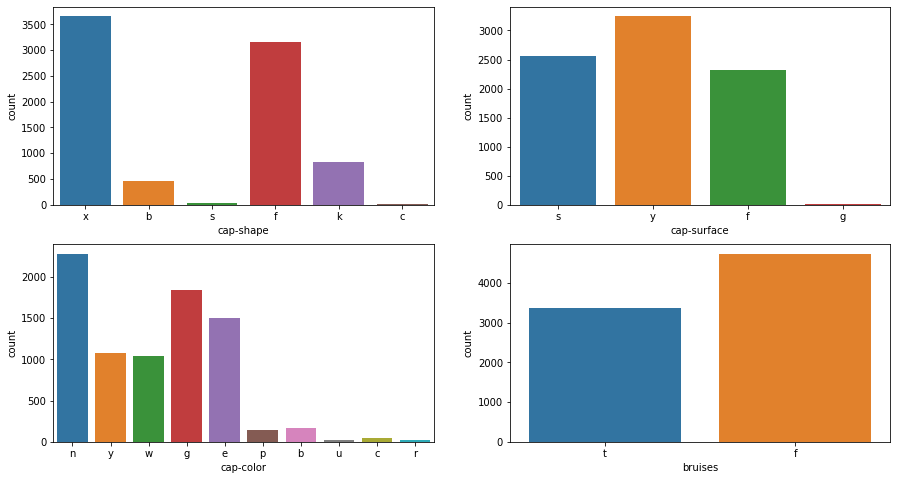

In [9]:
Bar(['cap-shape','cap-surface','cap-color','bruises'])

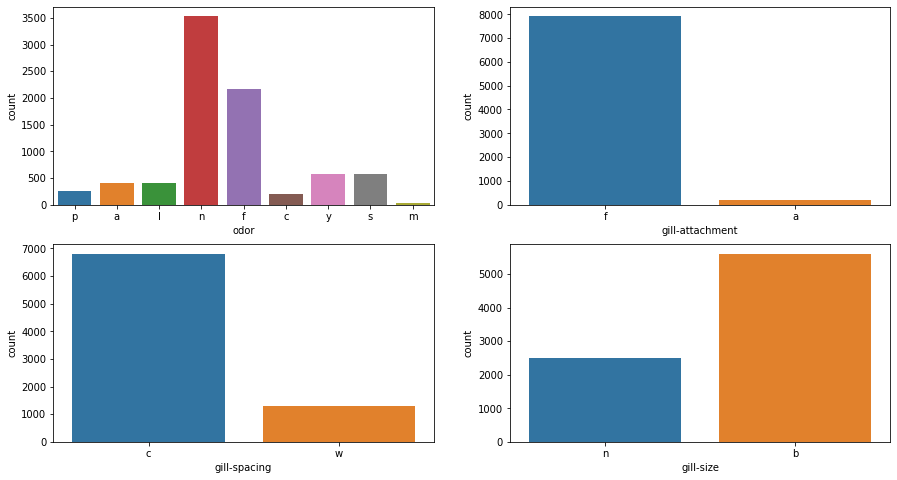

In [10]:
Bar(['odor','gill-attachment','gill-spacing','gill-size'])

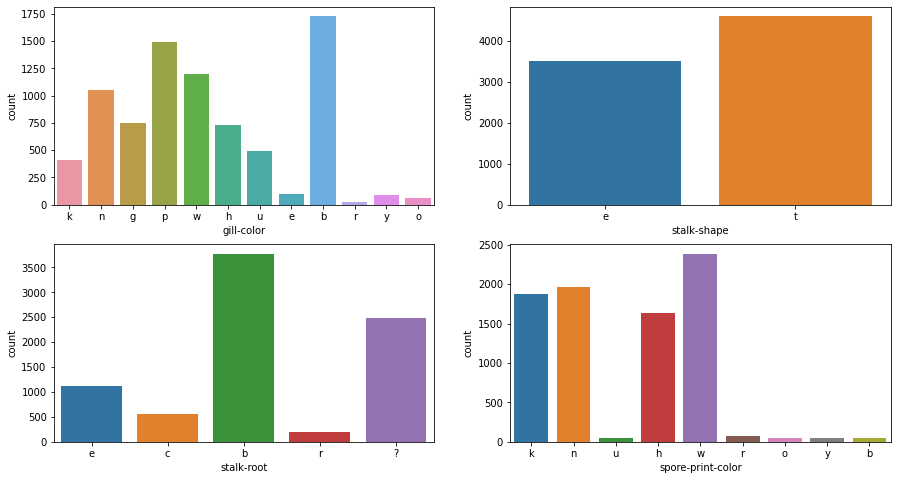

In [11]:
Bar(['gill-color','stalk-shape','stalk-root','spore-print-color'])

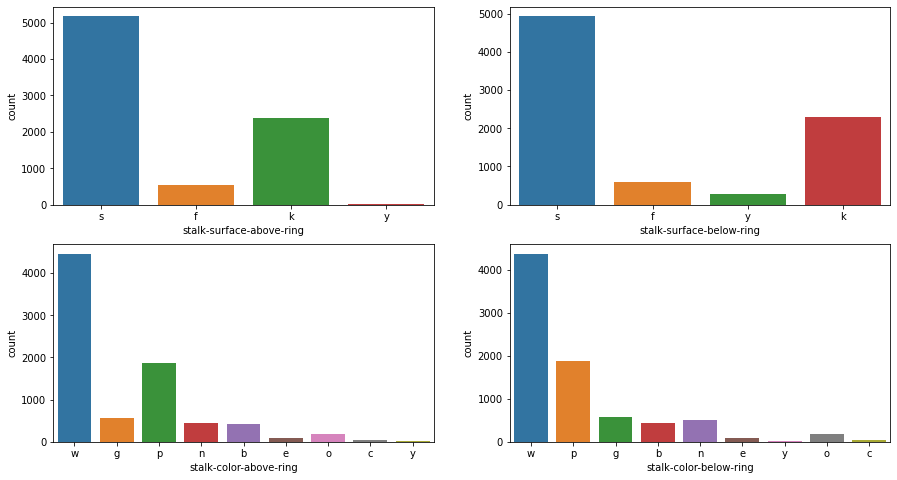

In [12]:
Bar(['stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring'])

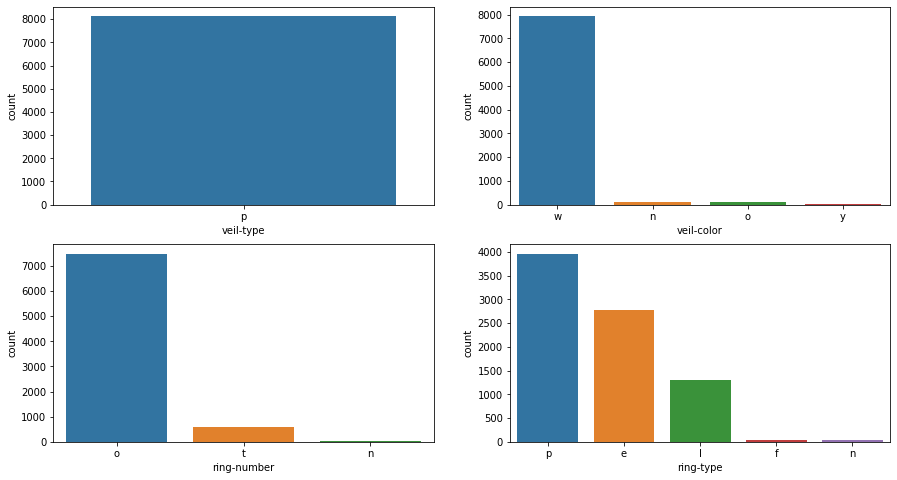

In [14]:
Bar(['veil-type','veil-color','ring-number','ring-type'])

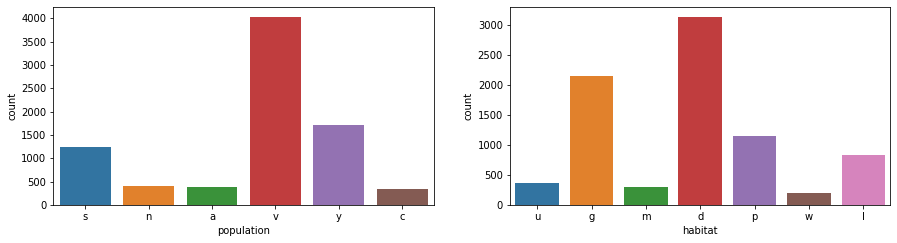

In [15]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.countplot(df['population'])

plt.subplot(2,2,2)
sns.countplot(df['habitat'])

In [16]:
habitat.keys()

dict_keys(['grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods'])

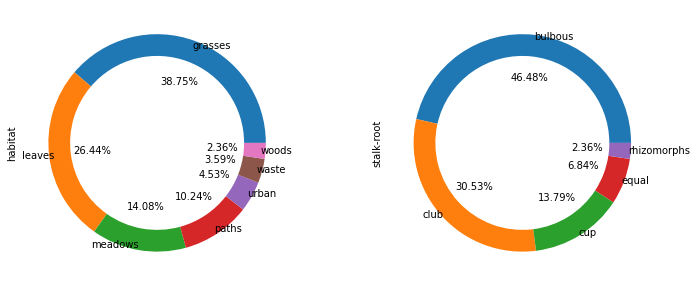

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['habitat'].value_counts().plot.pie(autopct="%0.2f%%",labels=habitat.keys(),labeldistance=0.95,wedgeprops=dict(width=0.2))


plt.subplot(1,2,2)
df['stalk-root'].value_counts().plot.pie(autopct="%0.2f%%",labels=stalk_root.keys(),wedgeprops=dict(width=0.2),labeldistance=0.98)

plt.show()

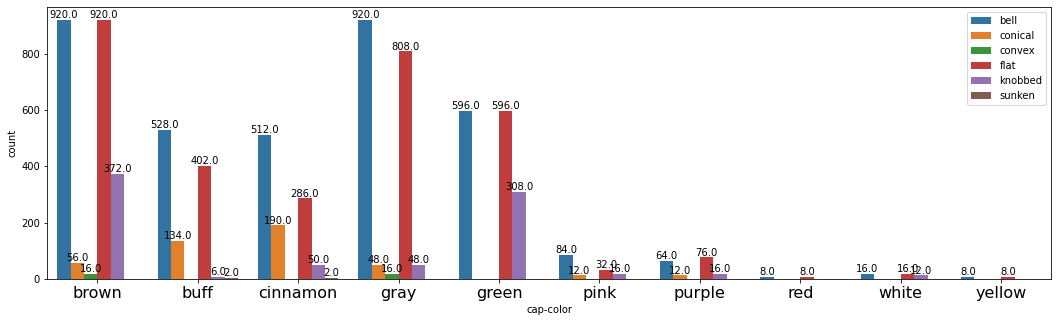

In [18]:
plt.figure(figsize=(18,5))
cap=sns.countplot(x=df['cap-color'],hue=df['cap-shape'])
cap.set_xticklabels(cap_color.keys())
plt.legend(labels=cap_shape.keys(),loc='upper right')
for i in cap.patches:
    cap.annotate(format(i.get_height()),
                      (i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom')
plt.xticks(fontsize=16)
plt.show()

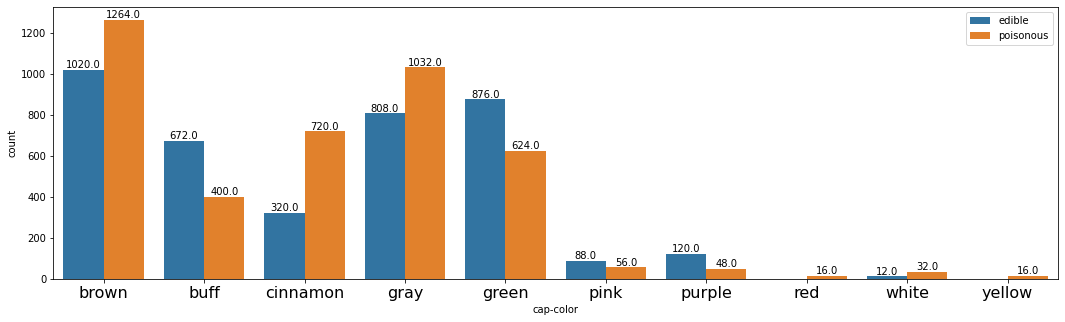

In [19]:
plt.figure(figsize=(18,5))
cap=sns.countplot(x=df['cap-color'],hue=df['class'])
cap.set_xticklabels(cap_color.keys())
plt.legend(labels=m_class,loc='upper right')
for i in cap.patches:
    cap.annotate(format(i.get_height()),
                      (i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom')
plt.xticks(fontsize=16)
plt.show()

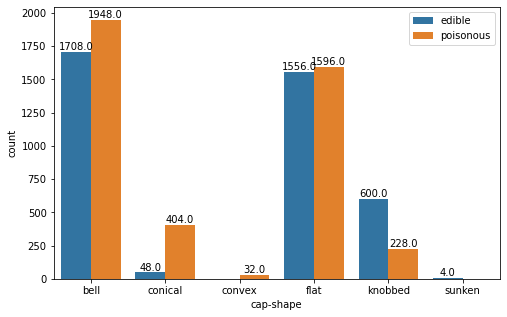

In [20]:
plt.figure(figsize=(8,5))
cap_stalk=sns.countplot(x=df['cap-shape'],hue=df['class'])
cap_stalk.set_xticklabels(cap_shape.keys())
for i in cap_stalk.patches:
    cap_stalk.annotate(format(i.get_height()),
                      (i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom')
plt.legend(labels=m_class)
plt.show()

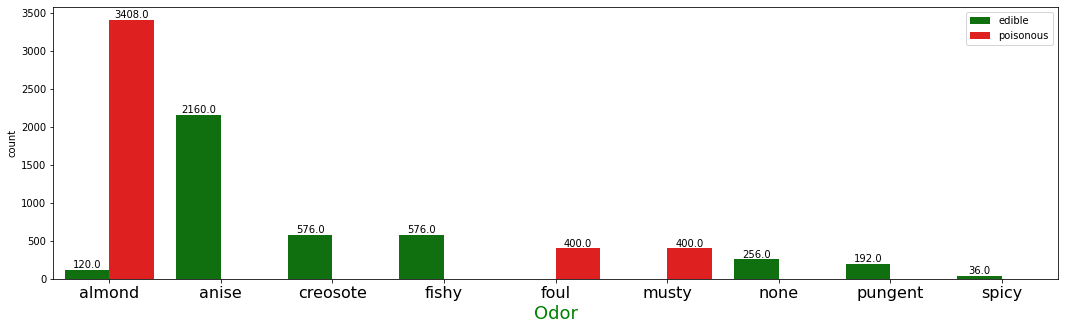

In [21]:
plt.figure(figsize=(18,5))
cap=sns.countplot(x=df['odor'],order=df['odor'].value_counts().index,hue=df['class'],palette=['green','red'])
cap.set_xticklabels(odor.keys())
plt.legend(labels=m_class,loc='upper right')
for i in cap.patches:
    cap.annotate(format(i.get_height()),
                      (i.get_x()+i.get_width()/2,i.get_height()),ha='center',va='bottom')
plt.xticks(fontsize=16)
plt.xlabel(xlabel='Odor',fontsize=18,color='green')
plt.show()

In [22]:
target=df['class']
df.drop('class',axis=1,inplace=True)
df=pd.get_dummies(df)
df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [23]:
df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [24]:
lb=LabelBinarizer()
target=lb.fit_transform(target)
target

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [25]:
x_train,x_test,y_train,y_test=train_test_split(df,target,random_state=9,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5686, 117), (2438, 117), (5686, 1), (2438, 1))

In [26]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(64,input_shape=(117,),activation='relu'),
#     tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),loss='binary_crossentropy',
              metrics=keras.metrics.BinaryAccuracy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7552      
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,081
Trainable params: 8,081
Non-trainable params: 0
_________________________________________________________________


In [27]:
history=model.fit(x_train,y_train,epochs=5,validation_split=0.2,callbacks=[tensorboard_callback])

Epoch 1/5
143/143 [==============================] - 1s 3ms/step - loss: 0.4456 - binary_accuracy: 0.8947 - val_loss: 0.3190 - val_binary_accuracy: 0.9192
Epoch 2/5
143/143 [==============================] - 0s 2ms/step - loss: 0.2526 - binary_accuracy: 0.9290 - val_loss: 0.1855 - val_binary_accuracy: 0.9429
Epoch 3/5
143/143 [==============================] - 0s 2ms/step - loss: 0.1541 - binary_accuracy: 0.9545 - val_loss: 0.1172 - val_binary_accuracy: 0.9728
Epoch 4/5
143/143 [==============================] - 0s 2ms/step - loss: 0.1035 - binary_accuracy: 0.9760 - val_loss: 0.0816 - val_binary_accuracy: 0.9842
Epoch 5/5
143/143 [==============================] - 0s 2ms/step - loss: 0.0763 - binary_accuracy: 0.9818 - val_loss: 0.0622 - val_binary_accuracy: 0.9868


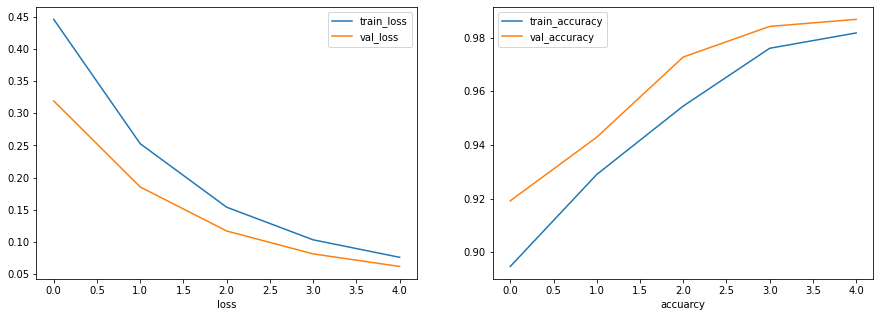

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['binary_accuracy'],label='train_accuracy')
plt.plot(history.history['val_binary_accuracy'],label='val_accuracy')
plt.xlabel('accuarcy')
plt.legend()
plt.show()

In [32]:
y_predict = np.argmax(model.predict(x_test), axis=-1)

In [33]:
model.evaluate(x_test,y_test)

77/77 [==============================] - 0s 3ms/step - loss: 0.0698 - binary_accuracy: 0.9836


[0.0698011964559555, 0.9835931062698364]

In [34]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      1291
           1       0.00      0.00      0.00      1147

    accuracy                           0.53      2438
   macro avg       0.26      0.50      0.35      2438
weighted avg       0.28      0.53      0.37      2438



Text(0.5, 15.0, 'Predicted Class')

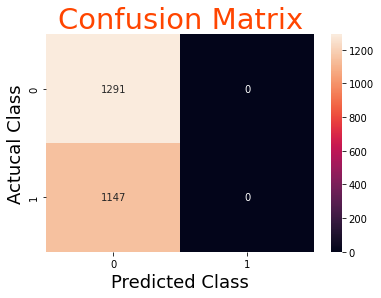

In [36]:
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True,fmt='g')
plt.title('Confusion Matrix',color='orangered',fontsize=29)
plt.ylabel('Actucal Class',fontsize=18)
plt.xlabel('Predicted Class',fontsize=18)